#      ANN MODEL FOR PREDICTION OF BUBBLE POINT
#                          PRESSURE OF CRUDE OILS

In [ ]:
## ALL LIBRARIES USED HERE

In [4]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import pandas as pd

In [ ]:
# ---------------EXCEL DATA---------------

In [6]:
data = pd.read_excel('Simulation Data (1).xlsx')

In [7]:
data.head()

,GOR,Oil gravity,Gas gravity,T,Pb,Bob
0,1507,0.951,39.3,225,3573.0,1.875
1,898,0.802,32.7,175,3571.0,1.471
2,898,0.802,32.7,150,3426.0,1.451
3,1579,0.930,42.8,235,3405.0,1.997
4,825,0.779,34.2,185,3354.0,1.431


In [1]:
#----------------   SPLIT DATA FOR TRAIN AND TEST ----------------

In [8]:
X_train, X_test, y_train, y_test =train_test_split(data[['GOR', 'Oil gravity', 'Gas gravity', 'T']], data.Pb)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

/Users/enkhbat/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/enkhbat/miniconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/enkhbat/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [9]:
# reshape no matter how many col it became 1
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [10]:

#-------------- Building NN model ------------------



In [11]:
tf.reset_default_graph()

X=tf.placeholder(dtype=tf.float32, shape=(None,4), name='X' )
y=tf.placeholder(dtype=tf.float32, shape=(None,1), name='y' )

# setup hidden layer. data, neuron act func name
h1=tf.layers.dense(X,8, activation=tf.nn.relu, name='hidden1')

# output layer

output=tf.layers.dense(h1, 1, activation=None, name='output')

loss=tf.losses.mean_squared_error(y, output)
optimizer=tf.train.AdamOptimizer(.01)

training_run=optimizer.minimize(loss)

In [ ]:
#---------- ITERATED 50 EPOCH ----------------

In [12]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for epoch in range(50):
        sess.run(training_run, feed_dict={X: X_train, y: y_train})
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        print('epoch', epoch, 'train loss', train_loss, 'test loss', test_loss)

epoch 0 train loss 4175242.8 test loss 5027713.0
epoch 1 train loss 4174960.5 test loss 5027440.0
epoch 2 train loss 4174674.5 test loss 5027165.0
epoch 3 train loss 4174383.0 test loss 5026887.0
epoch 4 train loss 4174085.5 test loss 5026606.5
epoch 5 train loss 4173784.8 test loss 5026321.0
epoch 6 train loss 4173478.2 test loss 5026031.5
epoch 7 train loss 4173168.8 test loss 5025736.0
epoch 8 train loss 4172853.8 test loss 5025436.0
epoch 9 train loss 4172534.8 test loss 5025129.0
epoch 10 train loss 4172211.5 test loss 5024818.0
epoch 11 train loss 4171884.2 test loss 5024499.0
epoch 12 train loss 4171552.2 test loss 5024173.0
epoch 13 train loss 4171212.5 test loss 5023840.0
epoch 14 train loss 4170868.8 test loss 5023498.0
epoch 15 train loss 4170517.2 test loss 5023148.5
epoch 16 train loss 4170159.8 test loss 5022790.0
epoch 17 train loss 4169795.0 test loss 5022422.5
epoch 18 train loss 4169424.5 test loss 5022046.5
epoch 19 train loss 4169045.2 test loss 5021660.0
epoch 20 t

In [13]:
#-----------5000 epoch iteration ---------------

In [14]:
init = tf.global_variables_initializer()

train_errs = []
test_errs = []
with tf.Session() as sess:
    init.run()
    
    for epoch in range(5000):
        # training is here
        sess.run(training_run, feed_dict={X: X_train, y: y_train})
        
        # Calculate train loss
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        train_errs.append(train_loss)
        
        # Calculate test loss
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        test_errs.append(test_loss)
        
        # Print losses
        if epoch %10==0:
            print('epoch', epoch, 'train loss', train_loss, 'test loss', test_loss)
    pred = sess.run(output, feed_dict={X: X_test})

epoch 0 train loss 4174372.0 test loss 5025887.0
epoch 10 train loss 4171230.8 test loss 5022272.5
epoch 20 train loss 4167722.8 test loss 5018158.0
epoch 30 train loss 4163442.8 test loss 5013187.0
epoch 40 train loss 4158146.0 test loss 5006977.0
epoch 50 train loss 4151486.8 test loss 4999149.5
epoch 60 train loss 4143273.0 test loss 4989478.0
epoch 70 train loss 4133200.5 test loss 4977611.0
epoch 80 train loss 4120810.0 test loss 4962980.5
epoch 90 train loss 4105829.2 test loss 4945167.0
epoch 100 train loss 4088048.8 test loss 4924259.5
epoch 110 train loss 4067511.5 test loss 4900290.0
epoch 120 train loss 4044204.0 test loss 4873257.0
epoch 130 train loss 4017923.5 test loss 4843012.0
epoch 140 train loss 3988549.0 test loss 4809207.0
epoch 150 train loss 3955984.0 test loss 4771592.0
epoch 160 train loss 3920106.8 test loss 4730152.0
epoch 170 train loss 3881258.0 test loss 4685138.0
epoch 180 train loss 3839652.2 test loss 4636684.5
epoch 190 train loss 3795336.8 test loss 4

epoch 1790 train loss 240671.69 test loss 214146.95
epoch 1800 train loss 238266.75 test loss 211751.83
epoch 1810 train loss 235801.08 test loss 209382.48
epoch 1820 train loss 233236.34 test loss 207037.95
epoch 1830 train loss 230549.84 test loss 204697.9
epoch 1840 train loss 227765.61 test loss 202366.62
epoch 1850 train loss 224858.14 test loss 200015.62
epoch 1860 train loss 221904.52 test loss 197657.3
epoch 1870 train loss 218897.12 test loss 195333.69
epoch 1880 train loss 215780.22 test loss 193043.98
epoch 1890 train loss 212634.25 test loss 190772.97
epoch 1900 train loss 209558.52 test loss 188553.16
epoch 1910 train loss 206495.39 test loss 186390.66
epoch 1920 train loss 203448.02 test loss 184279.44
epoch 1930 train loss 200425.73 test loss 182218.02
epoch 1940 train loss 197494.98 test loss 180221.45
epoch 1950 train loss 194659.66 test loss 178298.48
epoch 1960 train loss 191904.47 test loss 176420.73
epoch 1970 train loss 189226.69 test loss 174574.03
epoch 1980 tra

epoch 3470 train loss 98563.055 test loss 138498.77
epoch 3480 train loss 98502.336 test loss 138443.56
epoch 3490 train loss 98442.04 test loss 138388.08
epoch 3500 train loss 98382.09 test loss 138332.38
epoch 3510 train loss 98322.53 test loss 138276.28
epoch 3520 train loss 98263.32 test loss 138219.84
epoch 3530 train loss 98204.47 test loss 138163.03
epoch 3540 train loss 98145.96 test loss 138105.78
epoch 3550 train loss 98087.8 test loss 138048.58
epoch 3560 train loss 98029.94 test loss 137990.9
epoch 3570 train loss 97972.44 test loss 137933.14
epoch 3580 train loss 97915.25 test loss 137875.03
epoch 3590 train loss 97858.38 test loss 137816.88
epoch 3600 train loss 97801.945 test loss 137757.22
epoch 3610 train loss 97746.03 test loss 137696.34
epoch 3620 train loss 97690.04 test loss 137636.06
epoch 3630 train loss 97633.74 test loss 137575.89
epoch 3640 train loss 97577.65 test loss 137517.03
epoch 3650 train loss 97521.83 test loss 137459.8
epoch 3660 train loss 97466.37 

In [15]:
# ------------------- R square -------------------------

In [16]:
# Evaluate r^2
metrics.r2_score(y_test, pred)

0.883066323975672

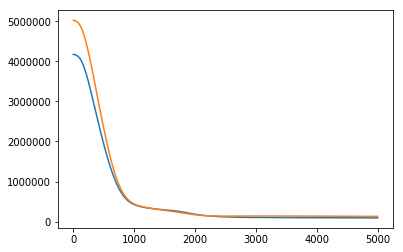

In [17]:
# Plot the learning curves
plt.plot(train_errs, label='Train loss')
plt.plot(test_errs, label="Test loss")

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:


#---------------        Mean Squared Error     ------------------



In [20]:
mean_squared_error(y_test, pred)

129625.04588041583

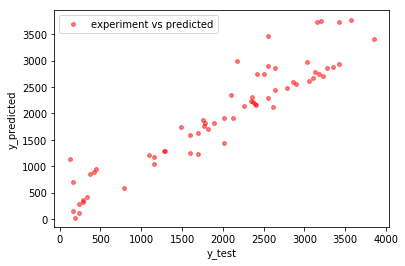

In [39]:
plt.scatter(y_test, pred, s=15, alpha=0.5, label="experiment vs predicted", color="red")
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.legend(loc='upper left')
plt.show()

In [40]:
type(y_test)

numpy.ndarray

In [69]:
len(pred)

64

In [93]:
df=pd.DataFrame({'y_test':[y_test[i][0] for i in range(len(y_test))],
                 'pred':[pred[i][0] for i in range(len(pred))]}, 
                index=[x for x in range(len(pred))])

In [94]:
df.describe()

,y_test,pred
count,64.000000,64.000000
mean,1979.789062,1966.768877
std,1061.192990,996.142724
min,122.500000,28.519741
25%,1251.250000,1221.892273
50%,2148.000000,2136.554199
75%,2808.000000,2744.015442
max,3851.000000,3774.819580
